# Linear Regression Bike Sharing Assignment

## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Step 1: Reading and Understanding the Data

In [2]:
# Importing the csv file of bike sharing dataset
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.shape

(730, 16)

In our bike sharing dataset, there are 730 rows and 16 columns. Lets check the data types of each column of the dataset

In [4]:
# Checking the information about the columns of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are 4 columns of float64 data type, 11 columns of int64 data type and 1 column of object data type

In [5]:
# Checking the statistical distribution of the data set
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


From above distribution we can see that, there are no outliers present in any of the column. 

In [6]:
# Checking the null values present in columns
df.isnull().sum()   

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

We can see that, there are no null values present 

## Step 2: Cleaning and Imputing the Data

In [7]:
# From above information we can see that, the column 'instant' is an Index. Therefore, we dont need this column in analysis. Lets drop it.
df.drop(['instant'], axis=1, inplace=True)

In [8]:
# The columns 'dteday', 'yr' and 'mnth' have same content. Therefore, we drop 'dteday' column and keep 'yr' and 'mnth' columns.
df.drop(['dteday'], axis=1, inplace=True)

In [9]:
# The column 'cnt' contains the count of total rental bikes including both casual and registered. So, we dont need to use 
# the casual and registered user's columns in analysis. Lets drop these columns.
df.drop(['casual', 'registered'], axis=1, inplace=True)

In [10]:
# Checking the information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


We left with 12 columns. From the data we can see that, 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit' all these columns are categorical. Amongst them we will impute 'season', 'weekday', 'weathersit' these with appropriate values.

In [11]:
# Lets impute the values in column 'season'. 1:spring, 2:summer, 3:fall, 4:winter
df['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace=True)
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,1321


We can see that, the column season contains the values with object data types. Similarly, we will impute the values in column 'weekday' and 'weathersit'.

In [12]:
# Lets impute the values of the column weekday as 0:sunday, 1:monday, 2:tuesday, 3:wednesday, 4:thursday, 5:friday, 6:saturday
df['weekday'].replace({0:'sunday', 1:'monday', 2:'tuesday', 3:'wednesday', 4:'thursday', 5:'friday', 6:'saturday'}, inplace=True)
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,monday,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,tuesday,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,wednesday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,thursday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,friday,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,saturday,0,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,sunday,0,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,monday,1,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,tuesday,1,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,wednesday,1,1,6.184153,7.54440,48.2917,14.958889,1321


The numeric values of the column weekday are replaced by object data values.

In [13]:
# Lets impute the values of the column weathersit as  1:Clear Few clouds, 2:Mist + Cloudy, 3:Light Snow, Light Rain + Thunderstorm + Scattered clouds, 4:Heavy Rain + Ice Pallets + Thunderstorm + Mist
df['weathersit'].replace({1:'Clear Few clouds', 2:'Mist + Cloudy', 3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds', 4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist'}, inplace=True)
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,monday,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,tuesday,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,wednesday,1,Clear Few clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,thursday,1,Clear Few clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,friday,1,Clear Few clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,saturday,0,Clear Few clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,sunday,0,Mist + Cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,monday,1,Mist + Cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,tuesday,1,Clear Few clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,wednesday,1,Clear Few clouds,6.184153,7.54440,48.2917,14.958889,1321


In [14]:
# Lets check the new information about the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


Here, the column 'mnth' is of int64 data type. We have to convert it to the object data type.

In [15]:
# Lets convert the data type of column 'mnth'
df['mnth'] = df['mnth'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 3: Performing EDA

In [16]:
# Creating a list of categorical variables
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
cat_cols

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

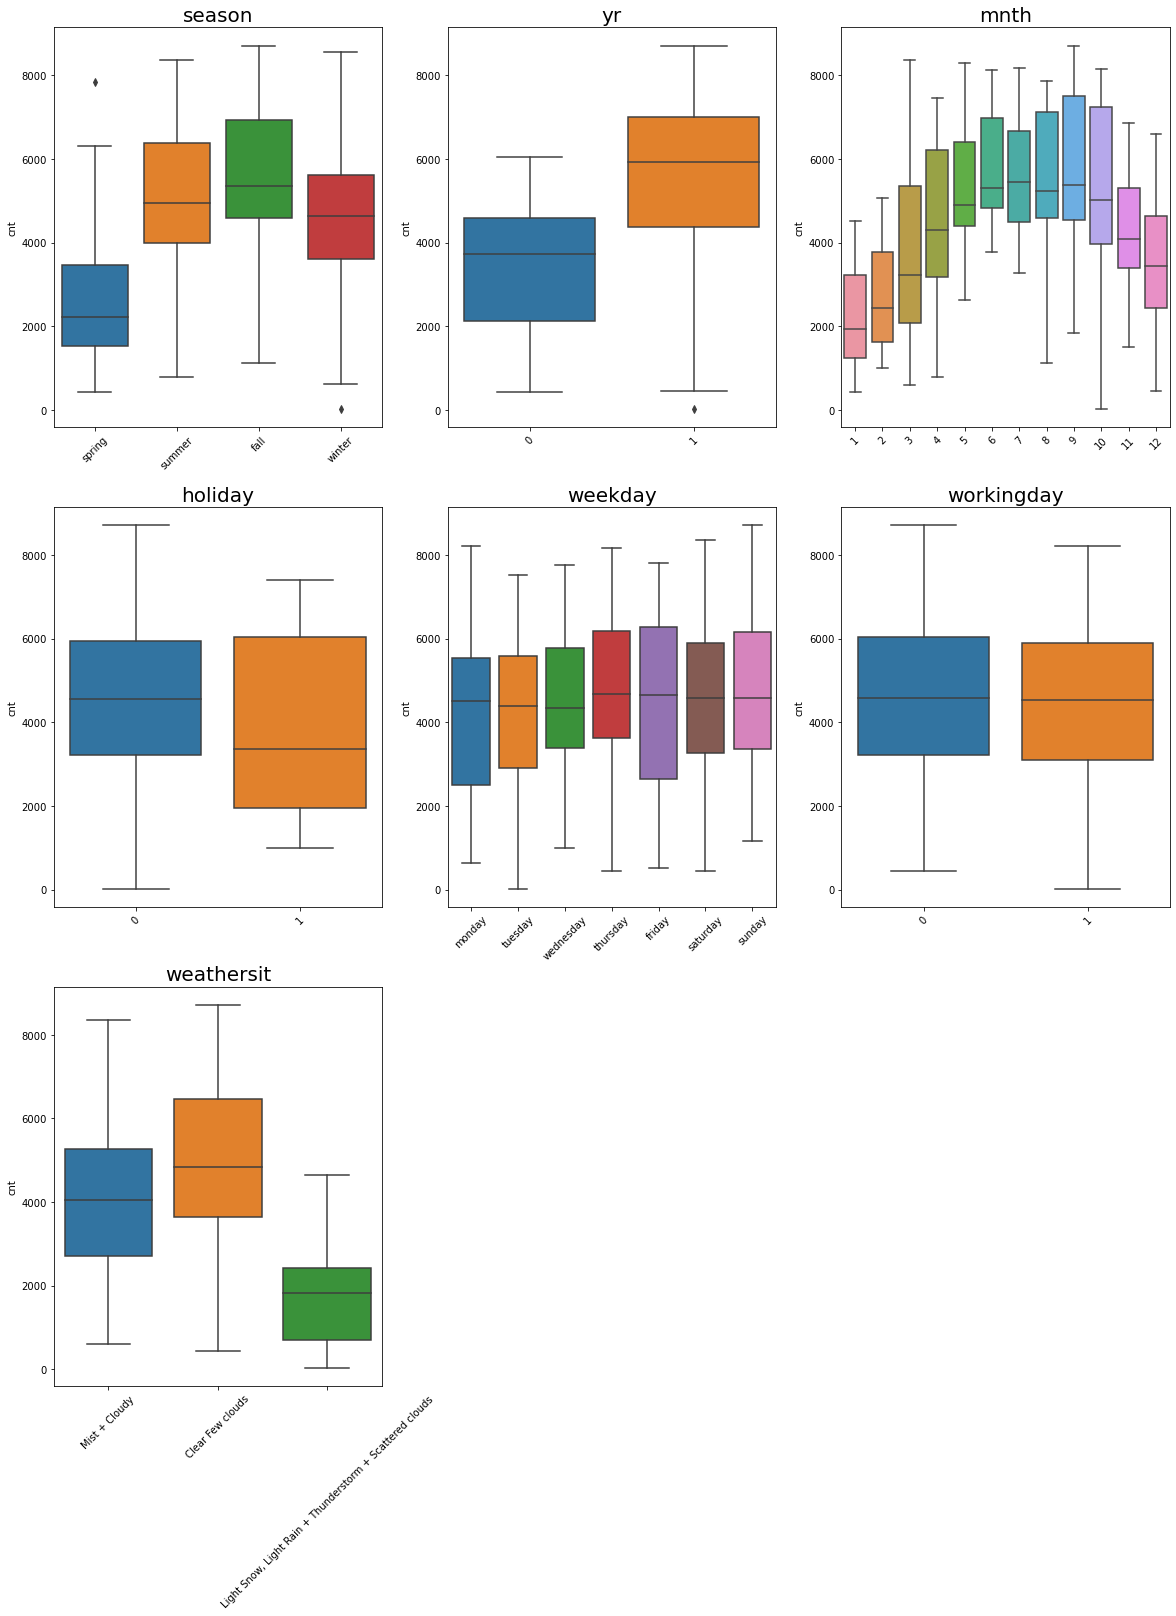

In [17]:
# Lets visualize the cat_cols to understand the data better
plt.figure(figsize=[20,25])
for i in enumerate(cat_cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df, x=i[1], y='cnt')
    plt.xticks(rotation=45)
    plt.title(i[1], fontdict={'fontsize':20})
    plt.xlabel('')

The demand for the bike sharing is more in summer and fall season as compared to spring season. The growth of the bike sharing system can be seen from boxplot of yr and mnth w.r.t cnt of the total rental bikes. When there is a holiday the demand for the bike sharing is less as compared to the weekdays or workingdays. When there is Clear few clouds the demand increases. When there is light snow, light rain + thunderstorm the demand decreases. Lets visualize the numerical variables
to infer more.

In [18]:
# Creating a list of Numerical variables
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
num_cols

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

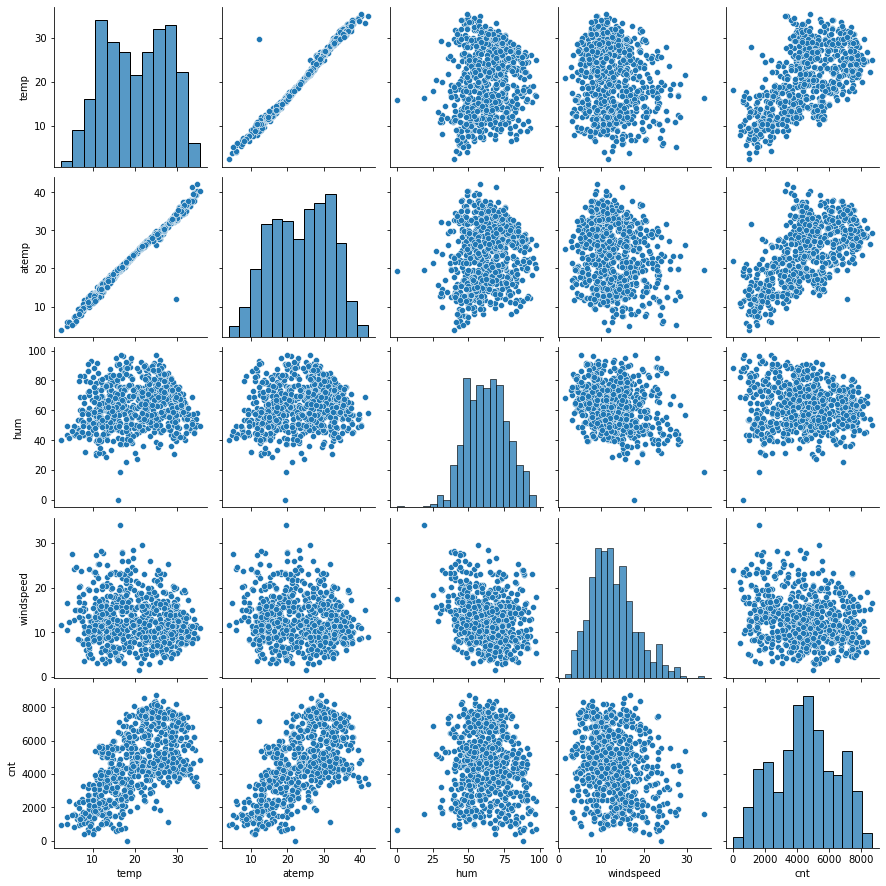

In [19]:
# Lets visualize the num_cols by using pairplot
sns.pairplot(data=df, vars=num_cols)
plt.show()

From above numerical distribution plot, we can see that, there is a high correlation between temp and atemp variables. As the cnt variable is target variable, we can see some linear pattern in temp and atemp var w.r.t cnt variable. So, we have to drop one of the variable that highly correlates with other to avoid multicollinearity. Lets drop temp variable and keep atemp. We can see the correlation between these variables by using heatmap also.

In [20]:
# Lets drop the column temp
df.drop(['temp'], axis=1, inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,monday,1,Mist + Cloudy,18.18125,80.5833,10.749882,985
1,spring,0,1,0,tuesday,1,Mist + Cloudy,17.68695,69.6087,16.652113,801
2,spring,0,1,0,wednesday,1,Clear Few clouds,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,thursday,1,Clear Few clouds,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,friday,1,Clear Few clouds,11.46350,43.6957,12.522300,1600


temp variable is removed from our data set. We have to add dummy variables for categorical data and combine those data with our original dataframe df to get the list of all the variables that affect our target variable.

In [21]:
# Lets create dummy variables for categorical data
season_dummy = pd.get_dummies(df['season'], drop_first=True)
season_dummy.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [22]:
# Similarly, for other categorical columns create dummies
weathersit_dummy = pd.get_dummies(df['weathersit'], drop_first=True)
weekday_dummy = pd.get_dummies(df['weekday'], drop_first=True)
mnth_dummy = pd.get_dummies(df['mnth'], drop_first=True)

In [23]:
# Lets concat this data with original data df
df = pd.concat([df, season_dummy], axis=1)
df = pd.concat([df, weathersit_dummy], axis=1)
df = pd.concat([df, weekday_dummy], axis=1)
df = pd.concat([df, mnth_dummy], axis=1)

In [24]:
# Lets check the new information about the data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   season                                                    730 non-null    object 
 1   yr                                                        730 non-null    int64  
 2   mnth                                                      730 non-null    object 
 3   holiday                                                   730 non-null    int64  
 4   weekday                                                   730 non-null    object 
 5   workingday                                                730 non-null    int64  
 6   weathersit                                                730 non-null    object 
 7   atemp                                                     730 non-null    float64
 8   hum                 

We have total 31 variables. The categorical columns for which we have added the dummies have to be dropped to avoid redundancy.

In [25]:
# Lets drop these categorical columns
df.drop(['season', 'weathersit', 'mnth', 'weekday'], axis=1, inplace=True)
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Now the data is ready to train the model. We left with 29 variables. Lets jump into the model building process by splitting the data into train-test.

## Step 4: Model Bulding Process

In [26]:
# Importing required library for splitting the data
from sklearn.model_selection import train_test_split

In [27]:
# Split the data frame df into train and test sets
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

The np.random.seed(0) provide a starting input for numpy's psudo random number generator. The psudo random numbers that we get from random will start from 0. This specifys that the train and test datasets always have same rows.

In [28]:
# Lets check the indexes of df_train
df_train.columns

Index([                                                      'yr',
                                                        'holiday',
                                                     'workingday',
                                                          'atemp',
                                                            'hum',
                                                      'windspeed',
                                                            'cnt',
                                                         'spring',
                                                         'summer',
                                                         'winter',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds',
                                                  'Mist + Cloudy',
                                                         'monday',
                                                       'saturday',
                                                         'sund

In [29]:
# Lets check the statistical distribution of the df_train
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,23.493909,63.112926,12.831318,4486.382353,0.243137,0.245098,0.24902,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.453386,8.090038,14.156632,5.291832,1952.158739,0.429398,0.430568,0.43287,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,24.020400,63.437500,12.083182,4530.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We have to adjust the scale of numeric variables 'cnt', 'atemp', 'hum', 'windspeed' so that the min and max values will bound in between 0 and 1. Lets import MinMaxScaler from preprocessing library.

In [30]:
# Importing MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [31]:
# Lets create the list of num_vars for scaling 
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.453386,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see from above distribution that, all the variables are bounded in between 0 and 1.

In [32]:
# Lets create X and y variables where y is dependent target var and X is independent predictor variable for df_train
y_train = df_train.pop('cnt')
X_train = df_train

In [33]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [34]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,"Light Snow, Light Rain + Thunderstorm + Scattered clouds",...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


Here the y axis contain 'cnt' var which is target var and X axis contain all the rest of vars which are predictors. To obtain the best possible model we need to try all possible combinations of independent vars. The manual method of feature selection is time consuming and infeasible. So, we need to combine the manual and automated approach in order to get optimal model. Lets start with automated approach using Recursive Feature Elimination (RFE).

In [35]:
# Import RFE from feature_selection library
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [36]:
# Lets start with 20 vars and will use combined approach to build a model
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,20)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [37]:
# Lets check the top n features using RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light Snow, Light Rain + Thunderstorm + Scattered clouds', True, 1),
 ('Mist + Cloudy', True, 1),
 ('monday', False, 5),
 ('saturday', True, 1),
 ('sunday', True, 1),
 ('thursday', False, 9),
 ('tuesday', False, 4),
 ('wednesday', False, 8),
 (2, False, 3),
 (3, True, 1),
 (4, True, 1),
 (5, True, 1),
 (6, True, 1),
 (7, False, 2),
 (8, True, 1),
 (9, True, 1),
 (10, True, 1),
 (11, False, 6),
 (12, False, 7)]

In [38]:
# Selecting those features having ranked 1 by RFE
features = X_train.columns[rfe.support_]
features

Index([                                                      'yr',
                                                        'holiday',
                                                     'workingday',
                                                          'atemp',
                                                            'hum',
                                                      'windspeed',
                                                         'spring',
                                                         'summer',
                                                         'winter',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds',
                                                  'Mist + Cloudy',
                                                       'saturday',
                                                         'sunday',
                                                                3,
                                                              

These are the vars that are ranked 1 by RFE

In [39]:
# Remove all other features that are ranked greater than 1 by RFE
X_train.columns[~rfe.support_]

Index(['monday', 'thursday', 'tuesday', 'wednesday', 2, 7, 11, 12], dtype='object')

In [40]:
X_train_rfe = X_train[features]
X_train_rfe.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,"Light Snow, Light Rain + Thunderstorm + Scattered clouds",Mist + Cloudy,saturday,sunday,3,4,5,6,8,9,10
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,0,1
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,1,0,1,1,0,0,0,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,1,0,1,0,1,0,0,0,0,0


We have taken the vars that are ranked 1 by rfe for further model building process and all other vars that are ranked greater than 1 are eliminated. Lets start model building using stats model.

In [41]:
# Model Building using stats model and adding constant to the train data set
import statsmodels.api as sm

X_train_rfe1 = sm.add_constant(X_train_rfe)

In [42]:
# Lets create an object of ordinary least squre class and use this object to learn the coefficients i.e fitting the model
lm = sm.OLS(y_train, X_train_rfe1).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     133.6
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          1.46e-183
Time:                        16:50:48   Log-Likelihood:                 514.47
No. Observations:                 510   AIC:                            -986.9
Df Residuals:                     489   BIC:                            -898.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

From above summary we can see that, the P values of some vars are greater that 0.05 which is insignificant. Lets check the VIF for these vars.

In [43]:
# Import required library
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['featuress'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,featuress,VIF
2,workingday,44.970764
4,hum,38.537068
3,atemp,25.286474
12,sunday,9.053426
7,summer,8.841076
11,saturday,8.657133
6,spring,6.941926
8,winter,5.808166
5,windspeed,5.470224
15,5,3.697076


We can see the variable 'workingday' has very high VIF of 45 and also have high P value 0.39 which is insignificant. So, lets drop this var and rebuild the model.

In [44]:
# Drop the var 'workingday'
X_train_rfe = X_train_rfe.drop(['workingday'], axis=1)

In [45]:
# Rebuild the model
X_train_rfe1 = sm.add_constant(X_train_rfe)

lm1 = sm.OLS(y_train, X_train_rfe1).fit()

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     140.7
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          1.76e-184
Time:                        16:50:49   Log-Likelihood:                 514.08
No. Observations:                 510   AIC:                            -988.2
Df Residuals:                     490   BIC:                            -903.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [46]:
# Lets check the VIF
vif = pd.DataFrame()
vif['featuress'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,featuress,VIF
3,hum,29.992398
2,atemp,17.842616
6,summer,8.101520
4,windspeed,4.741291
5,spring,4.637623
7,winter,4.198824
14,5,3.664182
13,4,3.356773
15,6,2.407513
9,Mist + Cloudy,2.304888


The var 'hum' has very high VIF of 30 but has low P value. The high VIF indicates that the var 'hum' is described well by rest of the feature var i.e. it is redundant. So, lets drop it.

In [47]:
# Drop the var 'hum'
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [48]:
# Rebuild the model
X_train_rfe2 = sm.add_constant(X_train_rfe)

lm2 = sm.OLS(y_train, X_train_rfe2).fit()

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     142.7
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          8.56e-182
Time:                        16:50:49   Log-Likelihood:                 504.99
No. Observations:                 510   AIC:                            -972.0
Df Residuals:                     491   BIC:                            -891.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [49]:
# Lets check the VIF
vif = pd.DataFrame()
vif['featuress'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,featuress,VIF
5,summer,6.992851
2,atemp,6.568146
3,windspeed,4.713241
13,5,3.648022
12,4,3.338666
6,winter,2.415085
4,spring,2.398906
14,6,2.351117
0,yr,2.087486
15,8,1.900431


The var 'summer' has a very high VIF of 7 and also has very high P value of 0.603 which is insignificant. So, lets drop it and rebuild the model.

In [50]:
# Drop the var 'summer'
X_train_rfe = X_train_rfe.drop(['summer'], axis=1)

In [51]:
# Rebuild the model
X_train_rfe3 = sm.add_constant(X_train_rfe)

lm3 = sm.OLS(y_train, X_train_rfe3).fit()

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     151.3
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          7.84e-183
Time:                        16:50:50   Log-Likelihood:                 504.84
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     492   BIC:                            -897.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [52]:
# Lets check the VIF
vif = pd.DataFrame()
vif['featuress'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,featuress,VIF
2,atemp,6.561117
3,windspeed,4.573300
5,winter,2.375213
4,spring,2.120275
0,yr,2.081168
14,8,1.888215
13,6,1.659868
12,5,1.612603
16,10,1.611911
7,Mist + Cloudy,1.568333


The var 'atemp' has a very high VIF of 6.56 but has low P. So, lets drop it and rebuild the model.

In [53]:
# Drop the var 'atemp'
X_train_rfe = X_train_rfe.drop(['atemp'], axis=1)

In [54]:
# Rebuild the model
X_train_rfe4 = sm.add_constant(X_train_rfe)

lm4 = sm.OLS(y_train, X_train_rfe4).fit()

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     117.3
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          2.09e-156
Time:                        16:50:51   Log-Likelihood:                 438.83
No. Observations:                 510   AIC:                            -843.7
Df Residuals:                     493   BIC:                            -771.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [55]:
# Lets check the VIF
vif = pd.DataFrame()
vif['featuress'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,featuress,VIF
2,windspeed,4.000917
4,winter,2.287663
3,spring,2.119594
0,yr,1.905998
15,10,1.569910
6,Mist + Cloudy,1.562672
10,4,1.487213
13,8,1.332082
11,5,1.325749
9,3,1.316527


The var '4' has a very high P value of 0.676 but has low VIF of 1.48. This var does not help much in prediction. Hence, lets drop it.

In [56]:
# Drop the var '4'
X_train_rfe = X_train_rfe.drop([4], axis=1)

In [57]:
# Rebuild the model
X_train_rfe5 = sm.add_constant(X_train_rfe)

lm5 = sm.OLS(y_train, X_train_rfe5).fit()

print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     125.3
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          2.00e-157
Time:                        16:50:51   Log-Likelihood:                 438.74
No. Observations:                 510   AIC:                            -845.5
Df Residuals:                     494   BIC:                            -777.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [58]:
# Lets check the VIF
vif = pd.DataFrame()
vif['featuress'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,featuress,VIF
2,windspeed,3.109626
4,winter,2.063317
0,yr,1.846218
3,spring,1.823914
14,10,1.568367
6,Mist + Cloudy,1.542497
9,3,1.280868
12,8,1.233979
10,5,1.226245
8,sunday,1.180728


The var 'saturday' has a very high P value of 0.111 but has low VIF of 1.16. This var does not help much in prediction. Hence, lets drop it and rebuild the model.

In [59]:
# Drop the var 'saturday'
X_train_rfe = X_train_rfe.drop(['saturday'], axis=1)

In [60]:
# Rebuild the model
X_train_rfe6 = sm.add_constant(X_train_rfe)

lm6 = sm.OLS(y_train, X_train_rfe6).fit()

print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     133.6
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          6.00e-158
Time:                        16:50:52   Log-Likelihood:                 437.43
No. Observations:                 510   AIC:                            -844.9
Df Residuals:                     495   BIC:                            -781.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [61]:
# Lets check the VIF
vif = pd.DataFrame()
vif['featuress'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,featuress,VIF
2,windspeed,3.086062
4,winter,2.055400
0,yr,1.844555
3,spring,1.815932
13,10,1.568290
6,Mist + Cloudy,1.535501
8,3,1.279561
11,8,1.222115
9,5,1.221140
10,6,1.166598


The var 'sunday' has a very high P value 0.097. It is insignificant therefore need to drop.

In [62]:
# Drop the var 'sunday'
X_train_rfe = X_train_rfe.drop(['sunday'], axis=1)

In [63]:
# Rebuild the model
X_train_rfe7 = sm.add_constant(X_train_rfe)

lm7 = sm.OLS(y_train, X_train_rfe7).fit()

print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     143.2
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          1.93e-158
Time:                        16:50:52   Log-Likelihood:                 436.01
No. Observations:                 510   AIC:                            -844.0
Df Residuals:                     496   BIC:                            -784.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [64]:
# Lets check the VIF
vif = pd.DataFrame()
vif['featuress'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,featuress,VIF
2,windspeed,3.051595
4,winter,2.053843
0,yr,1.839825
3,spring,1.813574
12,10,1.568286
6,Mist + Cloudy,1.522391
7,3,1.278757
8,5,1.220950
10,8,1.219915
9,6,1.165100


In [65]:
# Lets add var '2' which is a month to check whether the model improves or not
X_train_rfe[2] = X_train[2]
X_train_rfe.head()

,yr,holiday,windspeed,spring,winter,"Light Snow, Light Rain + Thunderstorm + Scattered clouds",Mist + Cloudy,3,5,6,8,9,10,2
653,1,0,0.300794,0,1,0,0,0,0,0,0,0,1,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0.255342,1,0,0,1,1,0,0,0,0,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0.188475,0,0,0,1,0,0,0,0,0,0,0


In [66]:
# Rebuild the model
X_train_rfe8 = sm.add_constant(X_train_rfe)

lm8 = sm.OLS(y_train, X_train_rfe8).fit()

print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     133.0
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          1.55e-157
Time:                        16:50:53   Log-Likelihood:                 436.45
No. Observations:                 510   AIC:                            -842.9
Df Residuals:                     495   BIC:                            -779.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [67]:
# Lets check the VIF
vif = pd.DataFrame()
vif['featuress'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,featuress,VIF
2,windspeed,3.082935
3,spring,2.292121
4,winter,2.058255
0,yr,1.839830
12,10,1.568383
6,Mist + Cloudy,1.522560
13,2,1.509409
7,3,1.395443
8,5,1.222563
10,8,1.221344


The var '2' has a very high P value of 0.359 which is insignificant. Lets drop it and rebuild the model.

In [68]:
# Drop the var '2'
X_train_rfe = X_train_rfe.drop([2], axis=1)

In [69]:
# Lets add var '7' which is a month to check whether the model improves or not
X_train_rfe[7] = X_train[7]
X_train_rfe.head()

,yr,holiday,windspeed,spring,winter,"Light Snow, Light Rain + Thunderstorm + Scattered clouds",Mist + Cloudy,3,5,6,8,9,10,7
653,1,0,0.300794,0,1,0,0,0,0,0,0,0,1,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0.255342,1,0,0,1,1,0,0,0,0,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0.188475,0,0,0,1,0,0,0,0,0,0,0


In [70]:
# Rebuild the model
X_train_rfe9 = sm.add_constant(X_train_rfe)

lm9 = sm.OLS(y_train, X_train_rfe9).fit()

print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     143.8
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          3.72e-164
Time:                        16:50:54   Log-Likelihood:                 452.25
No. Observations:                 510   AIC:                            -874.5
Df Residuals:                     495   BIC:                            -811.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [71]:
# Lets check the VIF
vif = pd.DataFrame()
vif['featuress'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,featuress,VIF
2,windspeed,3.293236
4,winter,2.127199
0,yr,1.909298
3,spring,1.904667
12,10,1.568914
6,Mist + Cloudy,1.523818
7,3,1.290938
10,8,1.254356
8,5,1.252397
9,6,1.193074


After addition of var '7' the p value of var 'winter' increased to 0.483 which actually becomes insignificant. So, lets drop it and rebuild the model.

In [72]:
# Drop the var 'winter'
X_train_rfe = X_train_rfe.drop(['winter'], axis=1)

In [73]:
# Rebuild the model
X_train_rfe10 = sm.add_constant(X_train_rfe)

lm10 = sm.OLS(y_train, X_train_rfe10).fit()

print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     154.9
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          3.75e-165
Time:                        16:50:54   Log-Likelihood:                 451.99
No. Observations:                 510   AIC:                            -876.0
Df Residuals:                     496   BIC:                            -816.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [74]:
# Lets check the VIF
vif = pd.DataFrame()
vif['featuress'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,featuress,VIF
2,windspeed,2.910044
0,yr,1.837736
3,spring,1.726352
5,Mist + Cloudy,1.478313
6,3,1.271282
11,10,1.211388
9,8,1.192185
7,5,1.190236
10,9,1.153853
8,6,1.148188


In [75]:
# Lets add var '11' which is a month to check whether the model improves or not
X_train_rfe[11] = X_train[11]
X_train_rfe.head()

,yr,holiday,windspeed,spring,"Light Snow, Light Rain + Thunderstorm + Scattered clouds",Mist + Cloudy,3,5,6,8,9,10,7,11
653,1,0,0.300794,0,0,0,0,0,0,0,0,1,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,1,0
426,1,0,0.255342,1,0,1,1,0,0,0,0,0,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0.188475,0,0,1,0,0,0,0,0,0,0,0


In [76]:
# Rebuild the model
X_train_rfe11 = sm.add_constant(X_train_rfe)

lm11 = sm.OLS(y_train, X_train_rfe11).fit()

print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     143.7
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          3.84e-164
Time:                        16:50:55   Log-Likelihood:                 452.22
No. Observations:                 510   AIC:                            -874.4
Df Residuals:                     495   BIC:                            -810.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [77]:
# Lets check the VIF
vif = pd.DataFrame()
vif['featuress'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,featuress,VIF
2,windspeed,3.236022
0,yr,1.867914
3,spring,1.856883
5,Mist + Cloudy,1.494638
6,3,1.283948
13,11,1.263172
11,10,1.258683
9,8,1.231298
7,5,1.230322
10,9,1.189982


The var '11' has a very high P value of 0.511 which is insignificant. Lets drop it and rebuild the model.

In [78]:
# Drop the var '11'
X_train_rfe = X_train_rfe.drop([11], axis=1)

In [79]:
# Lets add var '12' which is a month to check whether the model improves or not
X_train_rfe[12] = X_train[12]
X_train_rfe.head()

,yr,holiday,windspeed,spring,"Light Snow, Light Rain + Thunderstorm + Scattered clouds",Mist + Cloudy,3,5,6,8,9,10,7,12
653,1,0,0.300794,0,0,0,0,0,0,0,0,1,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,1,0
426,1,0,0.255342,1,0,1,1,0,0,0,0,0,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,0,0,1
482,1,0,0.188475,0,0,1,0,0,0,0,0,0,0,0


In [80]:
# Rebuild the model
X_train_rfe12 = sm.add_constant(X_train_rfe)

lm12 = sm.OLS(y_train, X_train_rfe12).fit()

print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     143.7
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          3.97e-164
Time:                        16:50:56   Log-Likelihood:                 452.18
No. Observations:                 510   AIC:                            -874.4
Df Residuals:                     495   BIC:                            -810.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [81]:
# Lets check the VIF
vif = pd.DataFrame()
vif['featuress'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,featuress,VIF
2,windspeed,2.994207
0,yr,1.852650
3,spring,1.727069
5,Mist + Cloudy,1.496295
6,3,1.297676
11,10,1.227199
9,8,1.207228
7,5,1.205636
10,9,1.165941
8,6,1.158503


The var '12' has a very high P value of 0.545 which is insignificant. Lets drop it and rebuild the model.

In [82]:
# Drop the var '12'
X_train_rfe = X_train_rfe.drop([12], axis=1)

In [83]:
# Lets add var 'monday' to check whether the model improves or not
X_train_rfe['monday'] = X_train['monday']
X_train_rfe.head()

,yr,holiday,windspeed,spring,"Light Snow, Light Rain + Thunderstorm + Scattered clouds",Mist + Cloudy,3,5,6,8,9,10,7,monday
653,1,0,0.300794,0,0,0,0,0,0,0,0,1,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,1,0
426,1,0,0.255342,1,0,1,1,0,0,0,0,0,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,0,0,1
482,1,0,0.188475,0,0,1,0,0,0,0,0,0,0,0


In [84]:
# Rebuild the model
X_train_rfe13 = sm.add_constant(X_train_rfe)

lm13 = sm.OLS(y_train, X_train_rfe13).fit()

print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     145.4
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          3.75e-165
Time:                        16:50:56   Log-Likelihood:                 454.63
No. Observations:                 510   AIC:                            -879.3
Df Residuals:                     495   BIC:                            -815.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [85]:
# Lets check the VIF
vif = pd.DataFrame()
vif['featuress'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,featuress,VIF
2,windspeed,2.985978
0,yr,1.837886
3,spring,1.734785
5,Mist + Cloudy,1.478451
6,3,1.272406
11,10,1.216643
9,8,1.197408
7,5,1.190245
13,monday,1.178442
10,9,1.155476


In [86]:
# Lets add var 'tuesday' to check whether the model improves or not
X_train_rfe['tuesday'] = X_train['tuesday']
X_train_rfe.head()

,yr,holiday,windspeed,spring,"Light Snow, Light Rain + Thunderstorm + Scattered clouds",Mist + Cloudy,3,5,6,8,9,10,7,monday,tuesday
653,1,0,0.300794,0,0,0,0,0,0,0,0,1,0,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0.255342,1,0,1,1,0,0,0,0,0,0,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,0,0,1,0
482,1,0,0.188475,0,0,1,0,0,0,0,0,0,0,0,0


In [87]:
# Rebuild the model
X_train_rfe14 = sm.add_constant(X_train_rfe)

lm14 = sm.OLS(y_train, X_train_rfe14).fit()

print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     137.3
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          3.26e-165
Time:                        16:50:57   Log-Likelihood:                 457.38
No. Observations:                 510   AIC:                            -882.8
Df Residuals:                     494   BIC:                            -815.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [88]:
# Lets check the VIF
vif = pd.DataFrame()
vif['featuress'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,featuress,VIF
2,windspeed,3.075805
0,yr,1.846484
3,spring,1.736645
5,Mist + Cloudy,1.479689
6,3,1.272411
11,10,1.223354
14,tuesday,1.212266
13,monday,1.211351
9,8,1.197420
7,5,1.191056


In [89]:
# Lets add var 'wednesday' to check whether the model improves or not
X_train_rfe['wednesday'] = X_train['wednesday']
X_train_rfe.head()

,yr,holiday,windspeed,spring,"Light Snow, Light Rain + Thunderstorm + Scattered clouds",Mist + Cloudy,3,5,6,8,9,10,7,monday,tuesday,wednesday
653,1,0,0.300794,0,0,0,0,0,0,0,0,1,0,0,0,1
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,1,0,0,1
426,1,0,0.255342,1,0,1,1,0,0,0,0,0,0,0,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,0,0,1,0,0
482,1,0,0.188475,0,0,1,0,0,0,0,0,0,0,0,0,0


In [90]:
# Rebuild the model
X_train_rfe15 = sm.add_constant(X_train_rfe)

lm15 = sm.OLS(y_train, X_train_rfe15).fit()

print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     129.3
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          1.08e-164
Time:                        16:50:57   Log-Likelihood:                 458.71
No. Observations:                 510   AIC:                            -883.4
Df Residuals:                     493   BIC:                            -811.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [91]:
# Lets check the VIF
vif = pd.DataFrame()
vif['featuress'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,featuress,VIF
2,windspeed,3.104147
0,yr,1.859817
3,spring,1.749305
5,Mist + Cloudy,1.483483
6,3,1.272432
14,tuesday,1.254055
15,wednesday,1.252152
11,10,1.245386
13,monday,1.244806
9,8,1.205875


The var 'wednesday' has a very high P value of 0.109 which is insignificant. Lets drop it and rebuild the model.

In [92]:
# Drop the var 'wednesday'
X_train_rfe = X_train_rfe.drop(['wednesday'], axis=1)

In [93]:
# Lets add var 'thursday' to check whether the model improves or not
X_train_rfe['thursday'] = X_train['thursday']
X_train_rfe.head()

,yr,holiday,windspeed,spring,"Light Snow, Light Rain + Thunderstorm + Scattered clouds",Mist + Cloudy,3,5,6,8,9,10,7,monday,tuesday,thursday
653,1,0,0.300794,0,0,0,0,0,0,0,0,1,0,0,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0.255342,1,0,1,1,0,0,0,0,0,0,0,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,0,0,1,0,0
482,1,0,0.188475,0,0,1,0,0,0,0,0,0,0,0,0,0


In [94]:
# Rebuild the model
X_train_rfe16 = sm.add_constant(X_train_rfe)

lm16 = sm.OLS(y_train, X_train_rfe16).fit()

print(lm16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     128.5
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          3.38e-164
Time:                        16:50:58   Log-Likelihood:                 457.53
No. Observations:                 510   AIC:                            -881.1
Df Residuals:                     493   BIC:                            -809.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [95]:
# Lets check the VIF
vif = pd.DataFrame()
vif['featuress'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,featuress,VIF
2,windspeed,3.167055
0,yr,1.862546
3,spring,1.738905
5,Mist + Cloudy,1.480858
6,3,1.275198
14,tuesday,1.256613
13,monday,1.253997
15,thursday,1.239481
11,10,1.229407
7,5,1.206874


The var 'thursday' has a very high P value of 0.595 which is insignificant. Lets drop it and rebuild the model.

In [96]:
# Drop the var 'thursday'
X_train_rfe = X_train_rfe.drop(['thursday'], axis=1)

We have considered all the predictor vars for model building and built 16 possible models. Out of which the model 14 i.e. lm14 seems to give good results. So we choose it for further predictions. To evaluate the model, we do residual analysis and predictions for validating the assumptions of regressions. The error terms must be normally distributed and independent. Lets predict the values of y_train df.

In [107]:
# Predicting the values of y_train df
y_train_pred = lm14.predict(X_train_rfe14)
y_train_pred.head()

653    0.773151
576    0.785469
426    0.453622
728    0.383607
482    0.588351
dtype: float64

These are the predicted values of target variable 'cnt'. Now we have to check the distribution of error terms.

In [102]:
# Calculating the error term i.e. Residual
Residual = y_train - y_train_pred
Residual.head()

653    0.091092
576    0.042189
426    0.011634
728   -0.179512
482   -0.105378
dtype: float64

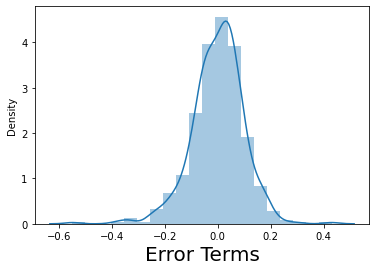

In [103]:
# Checking the histogram plot of error terms
sns.distplot(Residual, bins=20)
plt.xlabel('Error Terms', fontdict={'fontsize':20})
plt.show()

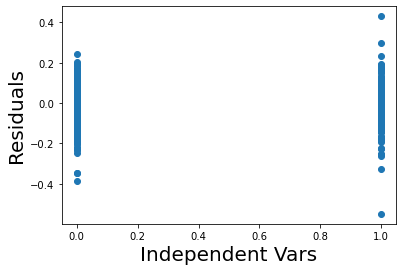

In [104]:
# Checking the independence of error terms
X_train_rfe14_new = X_train_rfe14.drop(['const'], axis=1)
X_T = X_train_rfe14_new.iloc[:,5].values
plt.scatter(x=X_T, y=Residual)
plt.xlabel('Independent Vars', fontdict={'fontsize':20})
plt.ylabel('Residuals', fontdict={'fontsize':20})
plt.show()

As we can see the error terms are normally distributed mean is approaching to 0 and standard deviation is 1 and error terms are also independent. 

In [105]:
# Checking the shape of our final trained model and error terms
print(X_train_rfe14.shape)
print(Residual.shape)

(510, 16)
(510,)


In [109]:
# Scaling the test data set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.054795,0.091324,0.086758,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758
std,0.500722,0.188034,0.481313,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.228100,0.288730,0.282125,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The numerical variables of test data set are scaled between 0 and 1

In [110]:
# Creating X and y test sets
y_test = df_test.pop('cnt')
X_test = df_test

The df X_test cotains all the independent vars. Lets replace these vars with our chosen model's vars.

In [113]:
# Using our model to make pridictions
X_test_rfe14 = X_test[X_train_rfe14_new.columns]
X_test_rfe14.head()

,yr,holiday,windspeed,spring,"Light Snow, Light Rain + Thunderstorm + Scattered clouds",Mist + Cloudy,3,5,6,8,9,10,7,monday,tuesday
184,0,1,0.084219,0,0,1,0,0,0,0,0,0,1,0,0
535,1,0,0.153728,0,0,0,0,0,1,0,0,0,0,0,0
299,0,0,0.334206,0,0,1,0,0,0,0,0,1,0,0,0
221,0,0,0.339570,0,0,0,0,0,0,1,0,0,0,0,0
152,0,0,0.537414,0,0,0,0,0,1,0,0,0,0,0,0


These are all the vars that we chosen for our test data prediction.

In [114]:
# Adding constant to X_test_updated df
X_test_rfe14 = sm.add_constant(X_test_rfe14)

In [115]:
# Making predictions for the test data by using chosen model
y_test_pred = lm14.predict(X_test_rfe14)
y_test_pred.head()

184    0.394961
535    0.827590
299    0.430163
221    0.553950
152    0.525744
dtype: float64

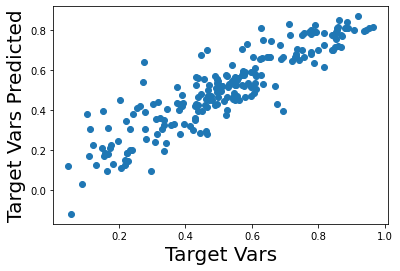

In [116]:
# Checking our best fitted line by using scatter plot
plt.scatter(x=y_test, y=y_test_pred)
plt.xlabel('Target Vars', fontdict={'fontsize':20})
plt.ylabel('Target Vars Predicted', fontdict={'fontsize':20})
plt.show()

The above plot shows that the actual demand of bike (cnt) and predicted demand overlapped. Hence we can say that the above model is able to explain the change in demand of bikes very well.

In [117]:
# Checking the mean squred error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

np.sqrt(mean_squared_error(y_test, y_test_pred))

0.09678028694323025

The deviation of predicted values from actual observed values is 0.0967 which is very low means that the model seems good enough to prdict the demand of bikes.

In [118]:
# Calculating the r squred value for test data
r_squred_test = r2_score(y_test, y_test_pred)
r_squred_test

0.8027947243011991

In [119]:
# Calculating the r squred value for train data
r_squred_train = r2_score(y_train, y_train_pred)
r_squred_train

0.8065284052400745

We can see that the R2 value of test and train data sets is almost equal means that the model is stable. The R2 value of our model is 0.8065 i.e. 80% of the data is being able to explained by the model. This ensures that the strength of linear regression model is good. Maximum possible variability in y is explained by the model.

In [121]:
# Lets View the summary of our final regression model
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     137.3
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          3.26e-165
Time:                        18:07:29   Log-Likelihood:                 457.38
No. Observations:                 510   AIC:                            -882.8
Df Residuals:                     494   BIC:                            -815.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [122]:
# Lets check the VIF
vif = pd.DataFrame()
vif['featuress'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,featuress,VIF
2,windspeed,3.075805
0,yr,1.846484
3,spring,1.736645
5,Mist + Cloudy,1.479689
6,3,1.272411
11,10,1.223354
14,tuesday,1.212266
13,monday,1.211351
9,8,1.197420
7,5,1.191056


## The equation of best fitted line is

## cnt = 0.4586 + 0.2474*yr - 0.0779*holiday - 0.1420*windspeed - 0.1947*spring - 0.3052*Light Snow, Light Rain + Thunderstorm + Scattered clouds - 0.0909*Mist + Cloudy + 0.0695*3 + 0.1158*5 + 0.1434*6 + 0.1435*8 + 0.1814*9 + 0.1099*10 + 0.1171*7 - 0.0335*monday - 0.0292*tuesday

### 1) Demand for the bike increases in month 3, 5, 6, 8, 9, 10, 7. We can say that the growth of bike sharing buisness increases yearly.

### 2) When there is a high windspeed, Light Snow, Light Rain + Thunderstorm + Scattered clouds, Mist + Cloudy, holiday, spring then the demand for the bike decreases. Also mondayand teusday have negative impact on bike demand.

### 3) The bike sharing buisness goes on increasing yearly except some envirmental conditions or holidays.